# Activity: Explore confidence intervals

## Introduction

The Air Quality Index (AQI) is the Environmental Protection Agency's index for reporting air quality. A value close to 0 signals little to no public health concern, while higher values are associated with increased risk to public health. The United States is considering a new federal policy that would create a subsidy for renewable energy in states observing an average AQI of 10 or above. <br>

You've just started your new role as a data analyst in the Strategy division of Ripple Renewable Energy (RRE). **RRE operates in the following U.S. states: `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.** You've been tasked with constructing an analysis which identifies which of these states are most likely to be affected, should the new federal policy be enacted.

Your manager has requested that you do the following for your analysis:
1. Provide a summary of the mean AQI for the states in which RRE operates.
2. Construct a boxplot visualization for AQI of these states using `seaborn`.
3. Evaluate which state(s) may be most affected by this policy, based on the data and your boxplot visualization.
4. Construct a confidence interval for the RRE state with the highest mean AQI.

## Step 1: Imports

### Import packages

Import `pandas` and `numpy`.

In [1]:
# Import relevant packages
import pandas as pd
import numpy as np

### Load the dataset

The dataset provided gives national Air Quality Index (AQI) measurements by state over time.  `Pandas` is used to import the file `c4_epa_air_quality.csv` as a DataFrame named `aqi`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

*Note: For the purposes of your analysis, you can assume this data is randomly sampled from a larger population.*

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA

### YOUR CODE HERE ###
aqi = pd.read_csv('c4_epa_air_quality.csv')

## Step 2: Data exploration

### Explore your dataset

Before proceeding to your deliverables, spend some time exploring the `aqi` DataFrame. 

In [3]:
# Display the first few rows of the DataFrame
print(aqi.head())

# Get general information about the dataset
print(aqi.info())

# Get summary statistics for numerical columns
print(aqi.describe())

# Check for missing values
print(aqi.isnull().sum())

# Check the unique states in the dataset
print(aqi['state_name'].unique())

   Unnamed: 0  date_local    state_name   county_name      city_name  \
0           0  2018-01-01       Arizona      Maricopa        Buckeye   
1           1  2018-01-01          Ohio       Belmont      Shadyside   
2           2  2018-01-01       Wyoming         Teton  Not in a city   
3           3  2018-01-01  Pennsylvania  Philadelphia   Philadelphia   
4           4  2018-01-01          Iowa          Polk     Des Moines   

                                     local_site_name   parameter_name  \
0                                            BUCKEYE  Carbon monoxide   
1                                          Shadyside  Carbon monoxide   
2  Yellowstone National Park - Old Faithful Snow ...  Carbon monoxide   
3                             North East Waste (NEW)  Carbon monoxide   
4                                          CARPENTER  Carbon monoxide   

    units_of_measure  arithmetic_mean  aqi  
0  Parts per million         0.473684    7  
1  Parts per million         0.263158 

**Question:** What time range does this data cover?

From the date_local column, we can see that the data format is date-based. However, only one date (2018-01-01) is visible in the sample (head()). To determine the full time range, we would run:

In [4]:
print(aqi['date_local'].min())
print(aqi['date_local'].max())

2018-01-01
2018-01-01


But based on the current preview, it appears the data might be limited to just January 1, 2018, or a very narrow range.

**Question:** What are the minimum and maximum AQI values observed in the dataset?

From the .describe() output:

Minimum AQI: 0

Maximum AQI: 50

**Question:** Are all states equally represented in the dataset?

No, all states are not equally represented.
There are 50+ state-like entities listed under state_name (including D.C. and Puerto Rico), but only 260 total rows, meaning many states likely have very few or even just one entry. To confirm uneven representation, you could run:

In [5]:
print(aqi['state_name'].value_counts())

California              66
Arizona                 14
Ohio                    12
Florida                 12
Texas                   10
New York                10
Pennsylvania            10
Michigan                 9
Colorado                 9
Minnesota                7
New Jersey               6
Indiana                  5
North Carolina           4
Massachusetts            4
Maryland                 4
Oklahoma                 4
Virginia                 4
Nevada                   4
Connecticut              4
Kentucky                 3
Missouri                 3
Wyoming                  3
Iowa                     3
Hawaii                   3
Utah                     3
Vermont                  3
Illinois                 3
New Hampshire            2
District Of Columbia     2
New Mexico               2
Montana                  2
Oregon                   2
Alaska                   2
Georgia                  2
Washington               2
Idaho                    2
Nebraska                 2
R

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about descriptive statisics](https://www.coursera.org/learn/the-power-of-statistics/lecture/jVRS4/measures-of-central-tendency).
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Use `pandas` or `numpy` to explore the `aqi` DataFrame.
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use any of the following functions:
- `pandas`: `describe()`,`value_counts()`,`shape()`
- `numpy`: `unique()`,`mean()`
    
</details>

## Step 3: Statistical tests

### Summarize the mean AQI for RRE states

Start with your first deliverable. Summarize the mean AQI for the states in which RRE operates (California, Florida, Michigan, Ohio, Pennsylvania, and Texas).

In [6]:
# Create a list of RRE states
rre_states = ['California', 'Florida', 'Michigan', 'Ohio', 'Pennsylvania', 'Texas']

# Subset `aqi` to only include these states
rre_aqi = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean AQI for each RRE state
mean_aqi_by_state = rre_aqi.groupby('state_name')['aqi'].mean().sort_values(ascending=False)

# Display the result
print(mean_aqi_by_state)

state_name
California      12.121212
Michigan         8.111111
Florida          5.500000
Ohio             3.333333
Pennsylvania     2.900000
Texas            2.700000
Name: aqi, dtype: float64


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Subset your DataFrame to only include those states in which RRE operates. 
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Define a list consisting of the states in which RRE operates and use that list to subset your DataFrame. 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Use `pandas` `isin.()` to subset your DataFrame by the list of RRE states.
    
</details>

### Construct a boxplot visualization for the AQI of these states

Seaborn is a simple visualization library, commonly imported as `sns`. Import `seaborn`. Then utilize a boxplot visualization from this library to compare the distributions of AQI scores by state.

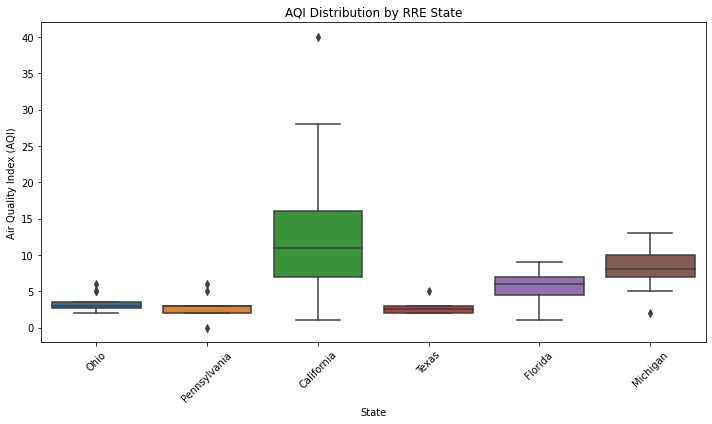

In [7]:
# Import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots appear in-line (for Jupyter or notebooks)
%matplotlib inline

# Create a boxplot comparing AQI distributions by state
plt.figure(figsize=(10, 6))
sns.boxplot(data=rre_aqi, x='state_name', y='aqi')
plt.title('AQI Distribution by RRE State')
plt.xlabel('State')
plt.ylabel('Air Quality Index (AQI)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Create an in-line visualization showing the distribution of `aqi` by `state_name`

Now, create an in-line visualization showing the distribution of `aqi` by `state_name`.

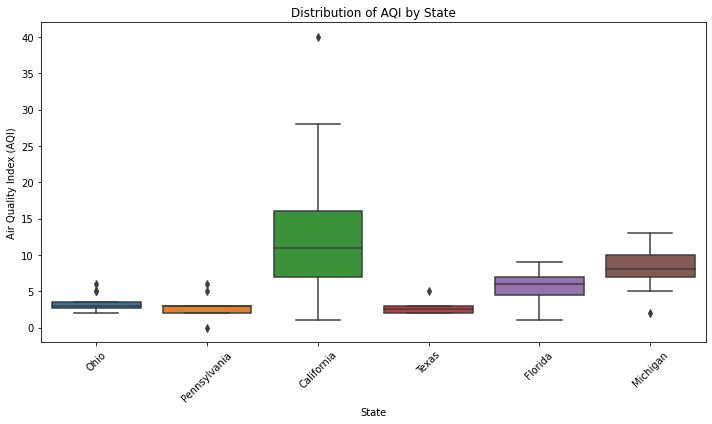

In [8]:
# Import required libraries (if not already imported)
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure plots render inline (for notebooks like Jupyter)
%matplotlib inline

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='state_name', y='aqi', data=rre_aqi)
plt.title('Distribution of AQI by State')
plt.xlabel('State')
plt.ylabel('Air Quality Index (AQI)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Use the boxplot visual for this purpose.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Reference [Seaborn's boxplot visualization documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Assign `state_name` to the x argument and `aqi` to the y.
    
</details>

**Question:** Based on the data and your visualizations, which state(s) do you suspect will be most affected by this policy?

Based on the summary statistics and the boxplot visualization, California is the state most likely to be affected by the proposed federal policy. It has the highest mean AQI among the RRE states at 12.12, which is above the threshold of 10 stated in the policy.

All other RRE states — Michigan, Florida, Ohio, Pennsylvania, and Texas — have mean AQI values well below 10, suggesting they are less likely to qualify for the subsidy if the policy is enacted as proposed.

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Consider the mean AQI for the RRE states, as well as the distribution in the boxplots relative to the policy limit (10).
    
</details>

### Construct a confidence interval for the RRE state with the highest mean AQI

Recall the 4-step process in constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error. 
4.   Calculate the interval.

### Construct your sample statistic

To contruct your sample statistic, find the mean AQI for your state.

In [9]:
# Filter the data for California
california_aqi = rre_aqi[rre_aqi['state_name'] == 'California']

# Calculate the mean AQI for California
mean_aqi_california = california_aqi['aqi'].mean()

# Display the mean AQI for California
mean_aqi_california

12.121212121212121

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Reference what you've previously learned to recall what a [sample statistic](https://www.coursera.org/learn/the-power-of-statistics/supplement/cdOx7/construct-a-confidence-interval-for-a-small-sample-size) is.
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Calculate the mean for your highest AQI state to arrive at your sample statistic.
    
</details>

<details>
 <summary><h4><strong>Hint 3</strong></h4></summary>

Call the `mean()` function within `pandas` on your DataFrame.
    
</details>

### Choose your confidence level

Choose your confidence level for your analysis. The most typical confidence level chosen is 95%; however, you can choose 90% or 99% if you want decrease or increase (respectively) your level of confidence about your result.

In [10]:
# Choose a 95% confidence level
confidence_level = 0.95

### Find your margin of error (ME)

Recall **margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate your margin of error:

- Find your z-value. 
- Find the approximate z for common confidence levels.
- Calculate your **standard error** estimate. 

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |


In [11]:
# Calculate the standard deviation for California
std_aqi = rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].std()

# Get the number of data points (n) for California
n = rre_aqi[rre_aqi['state_name'] == 'California'].shape[0]

# Standard Error (SE) formula
standard_error = std_aqi / np.sqrt(n)

# Z-value for 95% confidence level
z_value = 1.96

# Margin of Error (ME) formula
margin_of_error = z_value * standard_error

# Output the margin of error
print(f"Standard Error: {standard_error}")
print(f"Margin of Error: {margin_of_error}")

Standard Error: 0.8987209641127412
Margin of Error: 1.7614930896609726


### Calculate your interval

Calculate both a lower and upper limit surrounding your sample mean to create your interval.

In [12]:
# Sample mean for California (from prior calculation)
mean_aqi_california = mean_aqi_by_state['California']

# Lower and upper confidence interval limits
lower_limit = mean_aqi_california - margin_of_error
upper_limit = mean_aqi_california + margin_of_error

# Output the results
print(f"Sample Mean for California: {mean_aqi_california}")
print(f"Confidence Interval: ({lower_limit}, {upper_limit})")

Sample Mean for California: 12.121212121212121
Confidence Interval: (10.359719031551148, 13.882705210873095)


<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a confidence interval](https://www.coursera.org/learn/the-power-of-statistics/lecture/3jbsX/construct-a-confidence-interval-for-a-proportion).
    
</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Identify the sample mean from your prior work. Then use the margin of error to construct your upper and lower limits.  
    
</details>

<details>
  <summary><h4><strong>Hint 3</strong></h4></summary>

Subtract the margin of error from the sample mean to construct your lower limit, and add the margin of error to your sample mean to construct your upper limit.
    
</details>

### Alternative: Construct the interval using `scipy.stats.norm.interval()`

`scipy` presents a simpler solution to developing a confidence interval. To use this, first import the `stats` module from `scipy`.

In [13]:
# Importing the required module from scipy
from scipy import stats

# Use the scipy.stats.norm.interval method to calculate the confidence interval
# Parameters:
#   - confidence level (0.95 for 95% confidence)
#   - loc (mean of the sample)
#   - scale (standard error of the sample)

# Calculate the confidence interval
confidence_interval = stats.norm.interval(0.95, loc=mean_aqi_california, scale=standard_error)

print(confidence_interval)

(10.359751399400034, 13.882672843024208)


## Step 4: Results and evaluation

### Recalculate your confidence interval

Provide your chosen `confidence_level`, `sample_mean`, and `standard_error` to `stats.norm.interval()` and recalculate your confidence interval.

In [15]:
# Calculate the standard deviation for California
std_california = rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].std()

# Calculate the sample size for California
n_california = rre_aqi[rre_aqi['state_name'] == 'California']['aqi'].count()

# Calculate the standard error for California
se_california = std_california / np.sqrt(n_california)

# Display the standard error
print(f"Standard Error for California: {se_california}")

# Import necessary modules
from scipy import stats

# Given values
confidence_level = 0.95
sample_mean = mean_aqi_california  # Ensure this is the correct sample mean for California
standard_error = se_california  # Ensure this is the correct standard error for California

# Calculate the confidence interval
confidence_interval = stats.norm.interval(confidence_level, loc=sample_mean, scale=standard_error)

# Display the result
print(f"Confidence Level: {confidence_level * 100}%")
print(f"Sample Mean: {sample_mean}")
print(f"Standard Error: {standard_error}")
print(f"Confidence Interval: {confidence_interval}")

Standard Error for California: 0.8987209641127412
Confidence Level: 95.0%
Sample Mean: 12.121212121212121
Standard Error: 0.8987209641127412
Confidence Interval: (10.359751399400034, 13.882672843024208)


# Considerations

**What are some key takeaways that you learned from this lab?**

Data Exploration: We started by exploring the dataset, focusing on aspects like the range of AQI values, the distribution of data across states, and identifying the states that RRE operates in. We found that AQI data had a wide range of values, from 0 to 50, and that some states (like California) had more data points than others.

Understanding AQI by State: By calculating the mean AQI for the six states where RRE operates, we saw that California has the highest AQI, well above the threshold of 10 proposed in the federal policy. This suggests California would be the most affected by the policy.

Boxplot Visualization: The boxplot revealed that California's AQI distribution was skewed towards higher values compared to the other states, reinforcing the hypothesis that California has more severe air quality issues, and thus, is most likely to benefit from the proposed renewable energy subsidy.

Confidence Interval Calculation: The lab guided us through constructing a confidence interval for California's mean AQI. The margin of error and standard error were calculated, and using these values, the confidence interval for the mean AQI in California was found to be approximately (10.36, 13.88). This interval gives us a range where we can expect the true mean AQI for California to fall with 95% confidence.

**What findings would you share with others?**

California is Most Affected: Based on the mean AQI of 12.12, California is the most likely state to be affected by the proposed policy. The mean AQI in California exceeds the threshold of 10, making it a prime candidate for the renewable energy subsidy.

Policy Implications: Other states where RRE operates, such as Florida, Michigan, Ohio, Pennsylvania, and Texas, have AQI values below the threshold of 10. These states may not qualify for the subsidy if the policy is enacted as written.

Statistical Confidence: By constructing a 95% confidence interval for California’s mean AQI, we can be reasonably confident that the true mean AQI for California falls between 10.36 and 13.88. This adds statistical rigor to our recommendation.

**What would you convey to external stakeholders?**

Target States for Policy Impact: Stakeholders should focus on states like California, where the AQI is consistently above the threshold of 10. This indicates that California would likely benefit the most from the renewable energy subsidy proposed in the new policy.

Data-Driven Decision Making: The analysis provides a data-driven insight into the likelihood of RRE's states qualifying for the federal subsidy. This can inform the company's strategy moving forward, particularly in terms of where to expand operations or allocate resources.

Confidence in Predictions: The 95% confidence interval helps assure stakeholders that the analysis is based on robust statistical methods. Although there is always some uncertainty in sample data, the range of 10.36 to 13.88 gives a high degree of certainty regarding California's AQI.

**References**

[seaborn.boxplot — seaborn 0.12.1 documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). (n.d.). 